### Dataset [URL](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt)

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/RNN/Text Generation"

irish-lyrics-eof.txt  shakespeare.txt  sonnets.txt


In [3]:
import tensorflow as tf
tf.enable_eager_execution()
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import regularizers
import tensorflow.keras.utils as kutils 
import numpy as np 
import matplotlib.pyplot as plt

### Importing the dataset

In [0]:
dataset = open('/content/drive/My Drive/RNN/Text Generation/irish-lyrics-eof.txt').read()

In [0]:
corpus_data = dataset.lower().split("\n")

In [0]:
tokenizer = Tokenizer()

In [0]:
tokenizer.fit_on_texts(corpus_data)
word_index=tokenizer.word_index
total_words = len(word_index) + 1

In [8]:
total_words

2690

### create input sequences using list of tokens
### here jut we are taking last word as lable before that it will be input like fibonaci series

### here we need to use pre-padding of sequence 

In [0]:
sequences_input = []
for eachline in corpus_data:
    token_list = tokenizer.texts_to_sequences([eachline])[0]
    for i in range(1, len(token_list)):
        sequence_n_gram = token_list[:i+1]
        sequences_input.append(sequence_n_gram)


In [10]:
sequences_input

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [0]:
max_len_sequence = max([len(x) for x in sequences_input])
sequences_input = np.array(pad_sequences(sequences_input, maxlen=max_len_sequence, padding='pre'))

In [12]:
sequences_input

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]], dtype=int32)

In [0]:
x_train, y_train = sequences_input[:,:-1],sequences_input[:,-1]
y_train = kutils.to_categorical(y_train, num_classes=total_words)

### Hyper Parameter

In [0]:
vocab_size=total_words
embed_dim=100
max_len=max_len_sequence-1
trunc_type='post'
oov_tok="<OOV>"
num_epochs = 300
batch_size=64
l2=0.01
keep_prob=0.2

### Building a model

In [15]:
"""
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len_sequence-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(vocab_size/2, activation='relu', kernel_regularizer=regularizers.l2(l2)))
model.add(Dense(vocab_size, activation='softmax'))
"""

"\nmodel = Sequential()\nmodel.add(Embedding(vocab_size, 100, input_length=max_len_sequence-1))\nmodel.add(Bidirectional(LSTM(150, return_sequences = True)))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(100))\nmodel.add(Dense(vocab_size/2, activation='relu', kernel_regularizer=regularizers.l2(l2)))\nmodel.add(Dense(vocab_size, activation='softmax'))\n"

In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embed_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
    tf.keras.layers.Dropout(keep_prob),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(vocab_size/2, activation='tanh', kernel_regularizer=regularizers.l2(l2)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')    
])

In [17]:
#optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1345)              135845    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              3620740   
Total params: 4,487,185
Trainable params: 4,487,185
Non-trainable params: 0
______________________________________________

In [0]:
#earlyStopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01) 
#modelCheckpoint = ModelCheckpoint('Text_Generation_Using_N-gram.hdf5',verbose=1, save_best_only=True, mode='max')

In [19]:
history=model.fit(x_train, y_train,batch_size = batch_size, epochs=num_epochs,verbose=1)

Train on 12038 samples
Epoch 1/300
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
12038/12038 [==============================] - 21s 2ms/sample - loss: 7.0904 - acc: 0.0626
Epoch 2/300
12038/12038 [==============================] - 15s 1ms/sample - loss: 6.3204 - acc: 0.0689
Epoch 3/300
12038/12038 [==============================] - 16s 1ms/sample - loss: 6.1352 - acc: 0.0783
Epoch 4/300
12038/12038 [==============================] - 16s 1ms/sample - loss: 6.0127 - acc: 0.0816
Epoch 5/300
12038/12038 [==============================] - 15s 1ms/sample - loss: 5.8700 - acc: 0.0921
Epoch 6/300
12038/12038 [==============================] - 15s 1ms/sample - loss: 5.7314 - acc: 0.1014
Epoch 7/300
12038/12038 [==============================] - 15s 1ms/sample - loss: 5.6173 - acc: 0.1053
Epoch 8/300
12038/12038 [==============================] - 15s 1ms/sample - loss: 5.5200 - acc: 0.1108
Epoch 9/300
12038/12038 [==============================] - 

#### check the model behaviour using graph

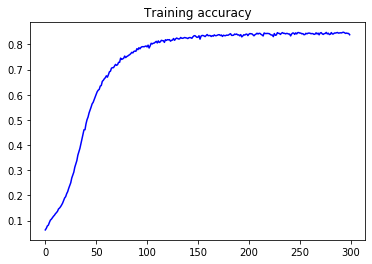

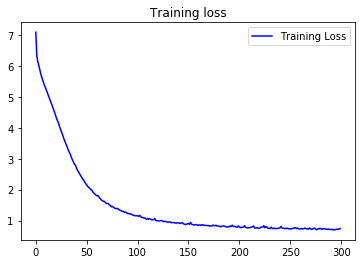

In [20]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [21]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(2690, 100)


### Testing the natural language genration of text

In [27]:
#seed_text = "How much more praise deserved, you only knows"
seed_text = "Come all ye maidens young and fair"
next_words = 150
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_len, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Come all ye maidens young and fair fellows of death you can tell the shure west casey the hobble in me friend thorn shaken when i again for me to me home you more came to the sea is wide in me fellows of silver rattling wherein a saint lived in fishin and off rate drifting spleen sun their ral he crew in the morning he crew both loud and shrill moving your toes a peeping thru de dow corporal casey the danes and saint sets on the raindrops only gathers out in our bow down lord daughter of the water distant golden erins isle in raw and the bridge of finea crowded with beer me lips lassies smile laughing turning blow goblins the warm by and birds proud more skibbereen brogue i sold my barley to me upon the rat control has you than my arms it are weary long day mild she englands fine groves
